# ENSO evolution relative to GMST for all models
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Load dependencies

In [2]:
import xarray as xr
import numpy as np
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.io import loadmat
from scipy import signal

Set data location

In [1]:
loc_nino34 = "../Data/ENSO_Indices/"
loc_gmst = "../Data/GMST/"

Models, experiments, colors, etc.

In [3]:
modelnames_fig = ['CCSM3 abrupt 2x','CCSM3 abrupt 4x','CCSM3 abrupt 8x', \
    'CESM1.0.4 abrupt 2x','CESM1.0.4 abrupt 4x','CESM1.0.4 abrupt 8x', 'CNRM-CM6.1 abrupt4x', \
    'GFDL-CM3 1pct 2x','GFDL-ESM2M 1pct 2x','GISS-E2-R 1pct 4x', \
    'GISS-E2-R abrupt 4x','HadCM3L abrupt 2x','HadCM3L abrupt 4x', \
    'HadCM3L abrupt 6x','HadCM3L abrupt 8x','IPSL-CM5A-LR abrupt 4x', \
    'MIROC3.2 1pct 2x','MIROC3.2 1pct 4x','MPIESM-1.2 abrupt 2x', \
    'MPIESM-1.2 abrupt 4x','MPIESM-1.2 abrupt 8x']

modelnames_file = ['CCSM3_abrupt2x','CCSM3_abrupt4x','CCSM3_abrupt8x', \
    'CESM104_abrupt2x','CESM104_abrupt4x','CESM104_abrupt8x', \
    'CNRMCM61_abrupt4x','GFDLCM3_1pct2x','GFDLESM2M_1pct2x','GISSE2R_1pct4x', \
    'GISSE2R_abrupt4x','HadCM3L_abrupt2x','HadCM3L_abrupt4x', \
    'HadCM3L_abrupt6x','HadCM3L_abrupt8x','IPSLCM5A_abrupt4x', \
    'MIROC32_1pct2x','MIROC32_1pct4x','MPIESM12_abrupt2x', \
    'MPIESM12_abrupt4x','MPIESM12_abrupt8x']

runtype = ['abrupt','abrupt','abrupt','abrupt','abrupt','abrupt','lin','lin','lin', \
            'abrupt','abrupt','abrupt','abrupt','abrupt','abrupt', \
            'lin','lin','abrupt','abrupt','abrupt','abrupt']

Function to hide right and top lines on axis

In [4]:
def hide_right_and_top(axis):
    
    # This function hides the right and top axes
    # of a given axis object
    # For purely aesthetic purposes
    
    # Hide the right and top spines
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    axis.yaxis.set_ticks_position('left')
    axis.xaxis.set_ticks_position('bottom')

#### Analysis

Loop through each model and plot

In [5]:
rm_yr = 100
rm_length = rm_yr*12

CCSM3_abrupt2x
19.52505883727013
CCSM3_abrupt4x
19.52505883727013
CCSM3_abrupt8x
19.52505883727013
CESM104_abrupt2x
35.45640774557238
CESM104_abrupt4x
35.45640774557238
CESM104_abrupt8x
35.45640774557238
CNRMCM61_abrupt4x
21.118060388596035
GFDLCM3_1pct2x
23.335038239651503
GFDLESM2M_1pct2x
25.29058619214399
GISSE2R_1pct4x
18.09742129577424
GISSE2R_abrupt4x
18.09742129577424
HadCM3L_abrupt2x
26.169668850878878
HadCM3L_abrupt4x
26.169668850878878
HadCM3L_abrupt6x
26.169668850878878
HadCM3L_abrupt8x
26.169668850878878
IPSLCM5A_abrupt4x
13.337839645566671
MIROC32_1pct2x
22.04499626497402
MIROC32_1pct4x
22.04499626497402
MPIESM12_abrupt2x
29.263772511336306
MPIESM12_abrupt4x
29.263772511336306
MPIESM12_abrupt8x
29.263772511336306


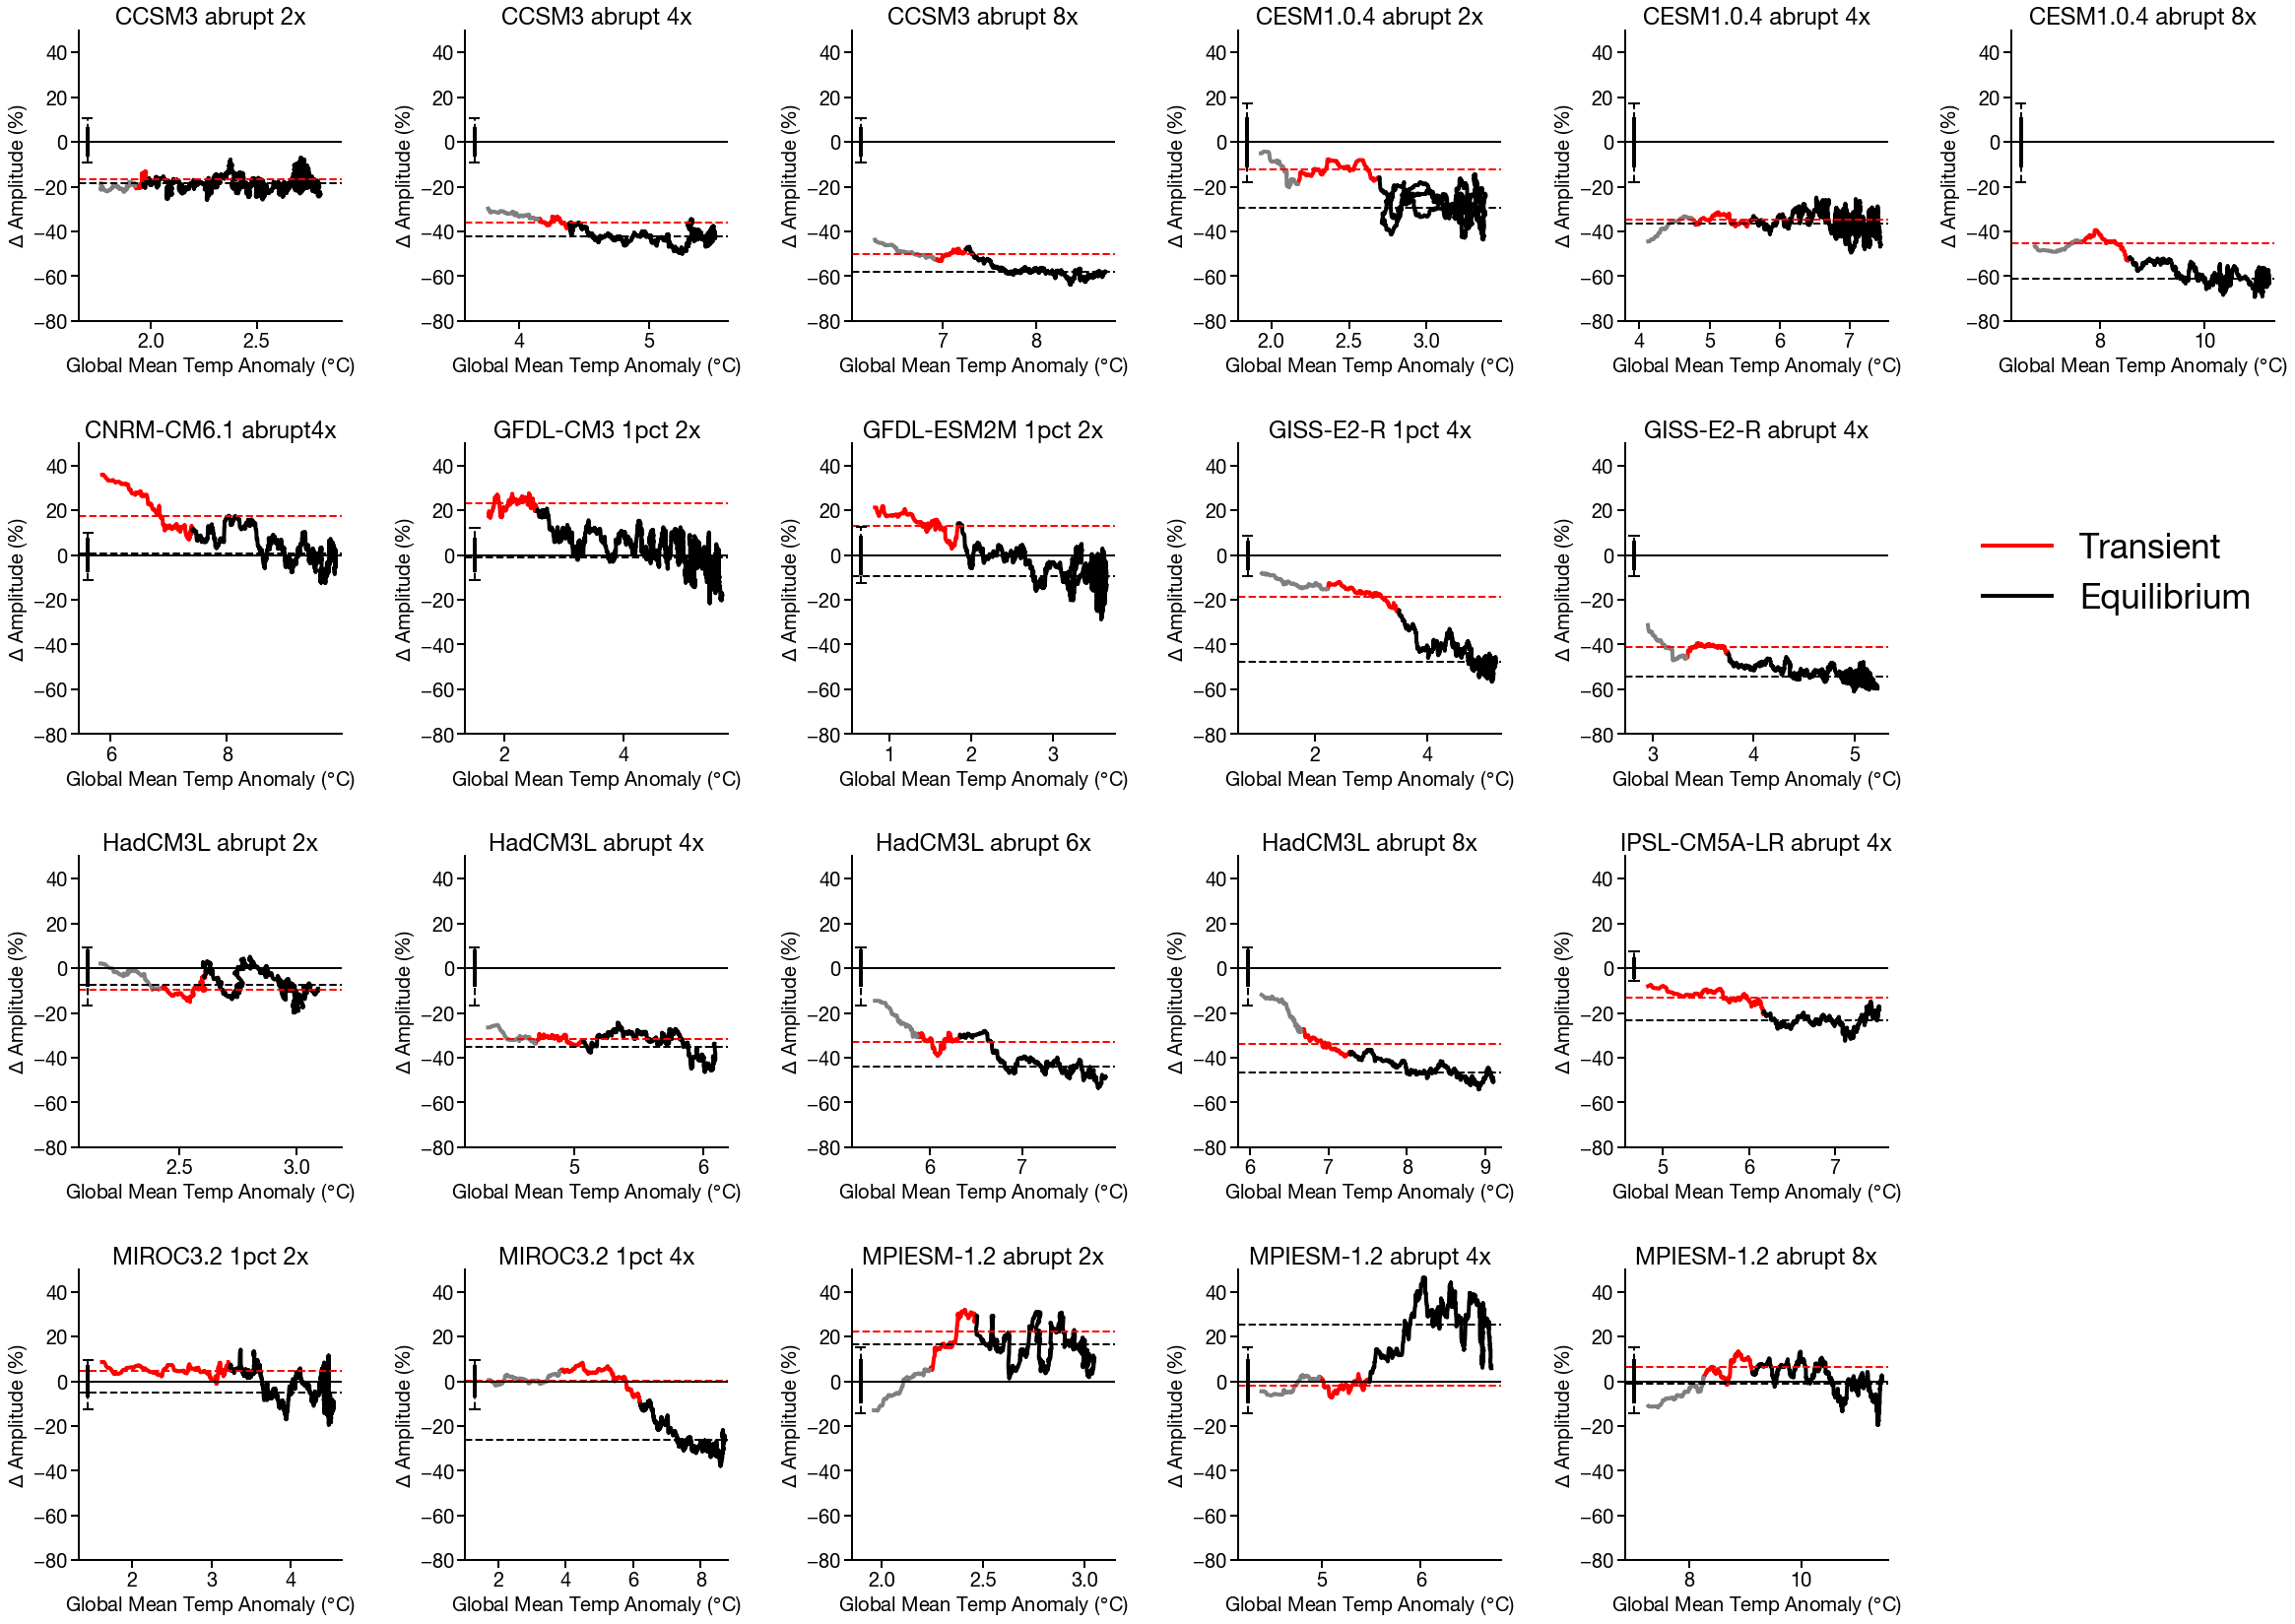

In [7]:
fig = plt.figure(figsize=(36,26))

rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 20
rcParams["axes.linewidth"] = 2
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 2

gs1 = gridspec.GridSpec(4,6)
gs1.update(left=0.1,right=0.96,top=0.93,bottom=0.1,wspace=0.47,hspace=0.42)

for i in np.arange(0,len(modelnames_file),1):
    
    print(modelnames_file[i])
    
    rm_length = rm_yr*12
        
    model, exp = modelnames_file[i].split("_")
    #print(modelnames_file[i])
    
    if ((model == "CCSM3") | (model == "CESM104")):
        ax = plt.subplot(gs1[0,i])
    elif ((model == "GFDLCM3") | (model == "GFDLESM2M") | (model == "GISSE2R") | (model == "CNRMCM61")):
        ax = plt.subplot(gs1[1,i-6])
    elif ((model == "HadCM3L") | (model == "IPSLCM5A")):
        ax = plt.subplot(gs1[2,i-11])
    else:
        ax = plt.subplot(gs1[3,i-16])
    hide_right_and_top(ax)
    
    # GMST
    gmst_anom = xr.DataArray(xr.open_dataset(loc_gmst+"GMST_anom_"+model+"_"+exp+".nc").data_vars["gmst"])

    # Nino3.4
    nino34_ctrl_anom = xr.DataArray(xr.open_dataset(loc_nino34+"nino34_"+model+"_control_anom_detrend2.nc").data_vars["nino34"])
    nino34_forced_anom = xr.DataArray(xr.open_dataset(loc_nino34+"nino34_"+model+"_"+exp+"_anom_detrend2.nc").data_vars["nino34"])
    
    #print("Calculating amplitude change...")
    
    std_f1 = pd.Series(nino34_forced_anom).rolling(rm_length,center=False).std().values
    std_c1 = pd.Series(nino34_ctrl_anom).rolling(rm_length,center=False).std().values
    gmst_anom1 = pd.Series(gmst_anom).rolling(rm_length,center=False).mean().values
    
    std_c = std_c1[~np.isnan(std_c1)]
    std_f = std_f1[~np.isnan(std_f1)]
    gmst_anom_2 = gmst_anom1[~np.isnan(gmst_anom1)]
    
    baseline = np.mean(std_c)
    amp_change = ((std_f - baseline)/baseline)*100
    amp_cdist = ((std_c - baseline)/baseline)*100
    
    
    # Split up amplitude change and GMST
    if runtype[i] == "abrupt":
        amp_change_eq = amp_change[150*12:]
        amp_change_trns = amp_change[(50*12):(150*12)]
        amp_change_fast = amp_change[0:(50*12)]
        
        gmst_eq = gmst_anom_2[150*12:]
        gmst_trns = gmst_anom_2[(50*12):(150*12)]
        gmst_fast = gmst_anom_2[0:(50*12)]
        
    else:
        amp_change_eq = amp_change[140*12:]
        amp_change_trns = amp_change[0:(140*12)]
        amp_change_fast = amp_change[0:1]
        
        gmst_eq = gmst_anom_2[140*12:]
        gmst_trns = gmst_anom_2[0:(140*12)]
        gmst_fast = gmst_anom_2[0:1]
    
    mean_change_eq = np.mean(amp_change_eq)
    mean_change_trns = np.mean(amp_change_trns)
    
        
    # Now plot ENSO / GMST
    
    plt.plot(gmst_trns,amp_change_trns,color="red",linewidth=4,label="Transient")
    plt.plot(gmst_eq,amp_change_eq,color="black",linewidth=4,label="Equilibrium")
    #plt.plot(gmst_trns,amp_change_trns,color="red",linewidth=4,label="CMIP5"+"\n"+"Analogy")
    #plt.plot(gmst_eq,amp_change_eq,color="black",linewidth=4,label="LongRunMIP"+"\n"+"Gain")
    plt.plot(gmst_fast,amp_change_fast,color="gray",linewidth=4)
    
    plt.axhline(y=mean_change_eq,linewidth=2,color="black",linestyle="--")
    plt.axhline(y=mean_change_trns,linewidth=2,color="red",linestyle="--")
    
    # Format and add bars near y axis
    gmst_diff = np.max(gmst_anom_2) - np.min(gmst_anom_2)
    addtl_window = gmst_diff*0.1
        
    plt.xlim([np.min(gmst_anom_2)-addtl_window,np.max(gmst_anom_2)+0.1])
    
    std_plus = np.mean(amp_cdist) + np.std(amp_cdist)
    std_minus = np.mean(amp_cdist) - np.std(amp_cdist)
    gmst_min = np.min(gmst_anom_2)
    gmst_max = np.max(gmst_anom_2)
    pctile95 = np.percentile(amp_cdist,95)
    pctile05 = np.percentile(amp_cdist,5)
    #print(str(std_plus)+", "+str(std_minus)+", "+str(pctile95)+", "+str(pctile05))
    dist_width = pctile95 - pctile05
    print(dist_width)
    
    
    plt.plot([gmst_min-(addtl_window*0.4),gmst_min-(addtl_window*0.8)],[pctile95,pctile95],color="black",linewidth=2,linestyle="-")
    plt.plot([gmst_min-(addtl_window*0.4),gmst_min-(addtl_window*0.8)],[pctile05,pctile05],color="black",linewidth=2,linestyle="-")
    plt.plot([gmst_min-(addtl_window*0.6),gmst_min-(addtl_window*0.6)],[pctile05,pctile95],color="black",linewidth=2,linestyle="--")
    
    #plt.plot([gmst_min-(addtl_window*0.4),gmst_min-(addtl_window*0.9)],[std_plus,std_plus],color="black",linewidth=3,linestyle="-")
    #plt.plot([gmst_min-(addtl_window*0.4),gmst_min-(addtl_window*0.9)],[std_minus,std_minus],color="black",linewidth=3,linestyle="-")
    plt.plot([gmst_min-(addtl_window*0.6),gmst_min-(addtl_window*0.6)],[std_minus,std_plus],color="black",linewidth=4,linestyle="-")
    
    
    # Other formatting
    ylimits = [-80,50]
    
    plt.ylim(ylimits)
    plt.ylabel("$\Delta$ Amplitude (%)")
    plt.xlabel("Global Mean Temp Anomaly ($\degree$C)")
        
    #plt.title(ex[i])
    plt.axhline(y=0,linewidth=2,color="k")
    
    # Red and gray shading
    
    #ax.fill_between([np.min(gmst_trns),np.max(gmst_trns)],np.min(ylimits),np.max(ylimits),color="red",alpha=0.1)
    #ax.fill_between([np.min(gmst_eq),np.max(gmst_eq)+0.4],np.min(ylimits),np.max(ylimits),color="gray",alpha=0.1)
    
    
    # Legend
    #if i == len(ex1)-1:
    if modelnames_file[i] == "GISSE2R_abrupt4x":
        plt.legend(frameon=False,loc="upper right",fontsize=35,bbox_to_anchor=(2.5, 0.8))
    
    plt.title(modelnames_fig[i])


plt.savefig("../Figures/FigS7_ENSO_GMST.pdf")
plt.show()